In [2]:
from fastai.vision.all import *

In [5]:
pip install fastbook

Note: you may need to restart the kernel to use updated packages.


In [6]:
import fastbook
fastbook.setup_book()
from fastbook import *

In [7]:
path = untar_data(URLs.PETS)/'images'

In [8]:
files = get_image_files(path)
len(files)                 

7390

In [9]:
def is_cat(x): return x[0].isupper()

In [10]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

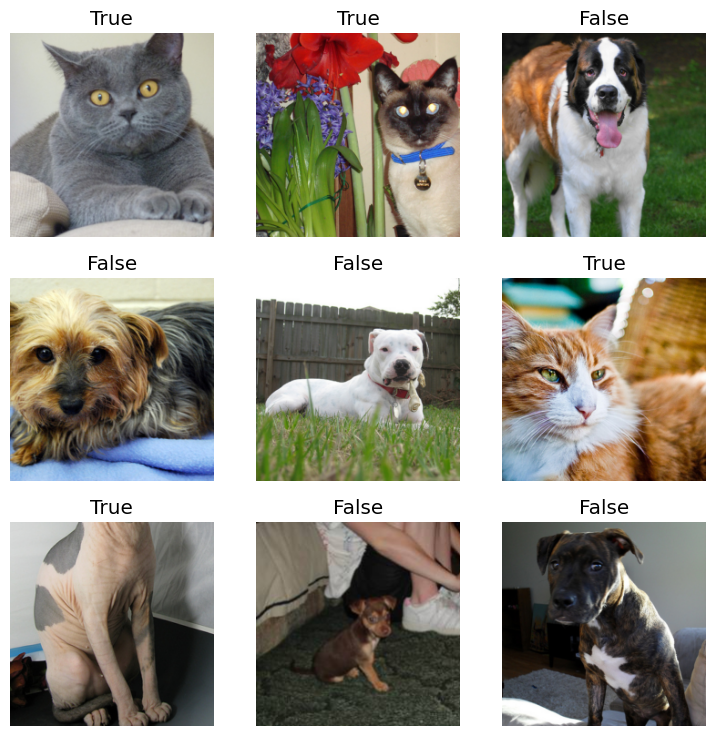

In [11]:
dls.show_batch()

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [13]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.145139,0.022385,0.007442,03:13


epoch,train_loss,valid_loss,error_rate,time
0,0.057791,0.011664,0.005413,04:55


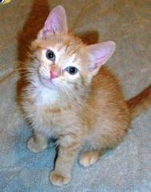

In [20]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [21]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [22]:
uploader = SimpleNamespace(data = ['Pictures/dog-puppy-on-garden-royalty-free-image-1586966191.jpg'])

In [24]:
import os
os.listdir('.')

['Music',
 '.DS_Store',
 'IsItCat.ipynb',
 '.CFUserTextEncoding',
 'Untitled.ipynb',
 'sd_backup.dmg',
 'Pictures',
 '.zprofile',
 '.zsh_history',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 '.android',
 '.cups',
 '.DDPreview',
 'Public',
 '.env',
 '.fastai',
 '.ssh',
 'Movies',
 'Applications',
 '.Trash',
 '.ipynb_checkpoints',
 '.jupyter',
 '.npm',
 'Documents',
 '.BrowserLock',
 '.dvdcss',
 'Downloads',
 '.python_history',
 '.DDLocalBackups',
 '.cache',
 '.viminfo',
 '.zsh_sessions']

In [25]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000001


In [46]:
pip install GraphViz

Note: you may need to restart the kernel to use updated packages.


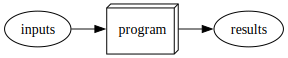

In [48]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

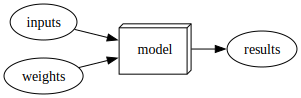

In [49]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

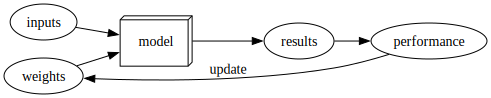

In [50]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

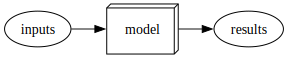

In [51]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

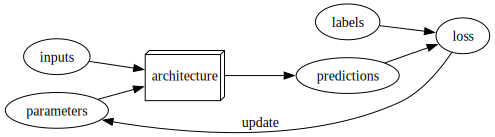

In [52]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

In [8]:
import graphviz
dot = graphviz.Digraph(comment='The Round Table')
dot
print(dot.source)

// The Round Table
digraph {
}



In [6]:
import ssl 

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.261878,2.148973,00:19


epoch,train_loss,valid_loss,time
0,1.852630,1.705418,00:09
1,1.615055,1.550157,00:09
2,1.456962,1.203132,00:09
3,1.325805,1.077450,00:09
4,1.200074,0.972116,00:09
5,1.082656,0.845560,00:09
6,0.983700,0.842293,00:09
7,0.908770,0.845167,00:09


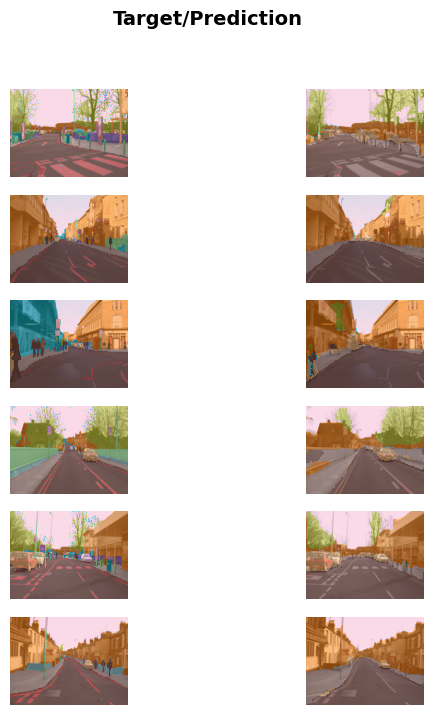

In [7]:
learn.show_results(max_n=6, figsize=(7,8))

In [3]:
from fastai.text.all import *

In [4]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 